<center><h2 style="color: rgb(94, 3, 0);">Models</h2></center>

### Table of Contents

***
* [1. Purpose of this part](#Purpose)
* [2. Question 1](#Question_1)
* [3. Question 2](#Question_2)
* [4. Question 3](#Question_3)
* [References](#References)

## 1. Purpose of this part <a class="anchor" id="Purpose"></a>
***

<h5>In this <u>Jupyter notebook</u>, we will learn about mathematical models. Once we get to the end we should be able to:</h5>

- Explain what a mathematical model is.
- Develop a mathematical model based on data points.
- Run code to find the best values for parameters of a model.
- Solve a modeling problem analytically.

#### The Problem 
***

In school, students are taught to draw lines like the following.

<h2>$$ y = 2 x + 1$$</h2>

They're taught to pick two values for $x$ and calculate the corresponding values for $y$ using the equation.
Then they draw a set of axes, plot the points, and then draw a line extending through the two dots on their axes.


`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like _MATLAB_. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes$^{[1]}$.

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

_NumPy_, which stands for _Numerical Python_, is a scientific computing library built on top of the _Python_ programming language.
The most common way to import _NumPy_ into your _Python_ environment is to use the following syntax: `import numpy as np`
The as `np` portion of the code then tells _Python_ to give _NumPy_ the alias of `np`. This allows you to use _NumPy_ functions by simply typing `np.function_name` rather than numpy$^{[2]}$.

In [2]:
# import the numpy package
import numpy as np

In [3]:
# change plot size
plt.rcParams['figure.figsize'] = [14, 7]

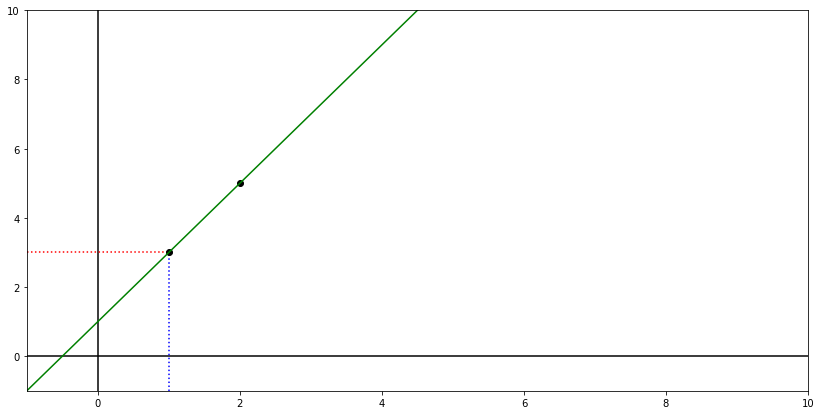

In [4]:
# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
plt.xlim([-1, 10])
plt.ylim([-1, 10])

# Show the plot.
plt.show()

Simple linear regression is about the opposite problem - what if you have some points and are looking for the equation?

It's easy when the points are perfectly on a line already, but usually real-world data has some noise.

The data might still look roughly linear, but aren't exactly so.

#### Analysis
***

I will do some experiment. Just imagine that w is an array containing the weight values and d is the corresponding distance measurements.

In [5]:
# create 'w' and 'd' arrays
w = np.arange(0.0, 41.0, 2.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 3.0, w.size)

In [6]:
# print the 'w' array
w

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40.])

In [7]:
# print the 'd' array
d

array([ 13.00871244,  19.40856942,  31.70397078,  35.40141731,
        52.98927735,  63.02529457,  71.61666079,  80.2027502 ,
        84.01926906,  97.33433975, 105.77653901, 122.78548739,
       129.82213711, 143.2534365 , 148.34801779, 162.07023221,
       175.31881835, 177.29455333, 194.89680044, 197.45021126,
       211.1514138 ])

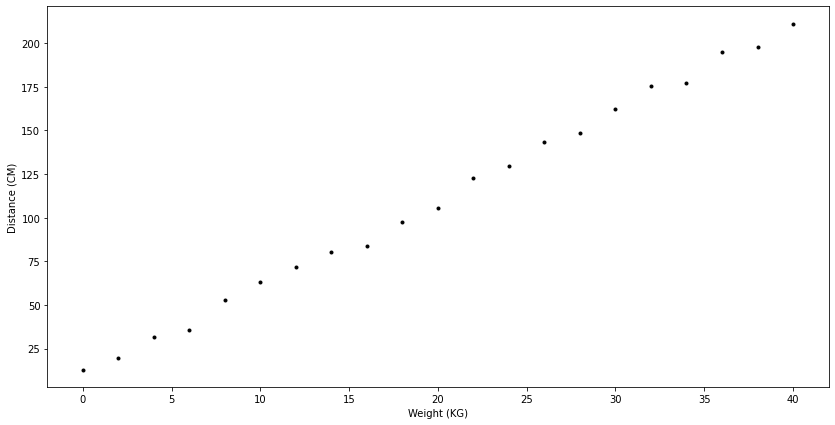

In [8]:
# Create the plot.
plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

#### Best fit line
***
I calculate $m$ and $c$ below.

In [9]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 5.016190 and c is 10.003718.


I am going to use the ``polyfit``. It can be used to fit lines in many dimensions.

In [10]:
np.polyfit(w, d, 1)

array([ 5.01619005, 10.00371837])

#### Minimising the cost

We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above.

For our given data set we can plot the cost value/function.

Recall that the cost is:

<h2>$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$</h2>

This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional.

In [11]:
# Calculate the cost
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

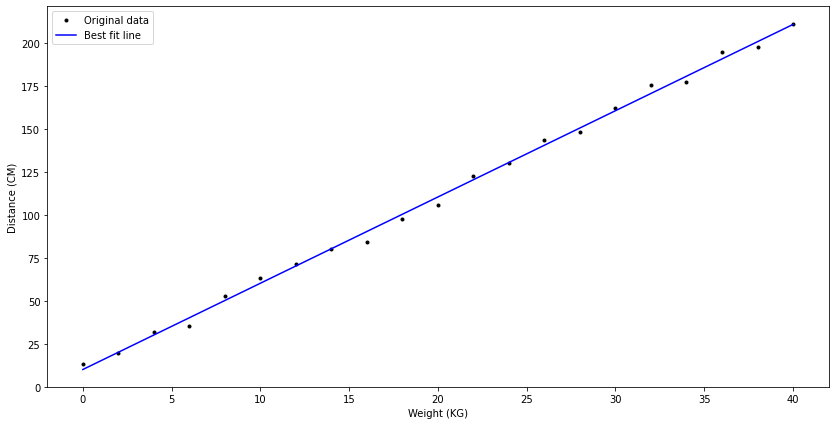

In [12]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

In [13]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  5.02 and c = 10.00:   204.65


## 2. Question 1 <a class="anchor" id="Question_1"></a>
***

<div class="alert alert-info"><h5>Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.</h5></div>

<h3>Absolute Value Function</h3>

***

An absolute value function is a function in algebra where the variable is inside the absolute value bars. This function is also known as the modulus function and the most commonly used form of the absolute value function is f(x) = |x|, where x is a real number. Generally, we can represent the absolute value function as, $$f(x) = a |x - h| + k$$ where a represents how far the graph stretches vertically, h represents the horizontal shift and k represents the vertical shift from the graph of $$f(x) = |x|$$ If the value of **'a'** is negative, the graph opens downwards and if it is positive, the graph opens upwards.

_**random**_ — Generate pseudo-random numbers$^{[3]}$

`random.randrange(start, stop[, step])` - Function for integers

In [14]:
# import the random package
import random

In [15]:
# Generate a random negative number
number = random.randrange(-30, 0)
# print the 'number'
number

-14

In [16]:
# import the numpy package
import numpy as np

`np.absolute()` - Calculate the absolute value element$^{[4]}$

In [17]:
# Get the absolute value of the 'number'
abs_number = np.absolute(number)
# print the 'abs_number'
abs_number

14

In [18]:
print(f'Created a negative number is [{number}] and the absolute value of that number is [{abs_number}].')

Created a negative number is [-14] and the absolute value of that number is [14].


In [19]:
# Get the absolute values of multiple elements of 1-d array
array = [11, -97, 1, -3, -32, 33]
abs_array = np.absolute(array)

# print the 'abs_array'
abs_array

array([11, 97,  1,  3, 32, 33])

In [20]:
# Get the absolute values of 2-D array elements
array_1 = np.array([[-12, 18, -3, 54], 
                   [9, -4, -12, 16],
                  [-3, 4, -2, 6]])
abs_array_1 = np.absolute(array_1)

# print the 'abs_array_1'
abs_array_1

array([[12, 18,  3, 54],
       [ 9,  4, 12, 16],
       [ 3,  4,  2,  6]])

In [21]:
# Get the absolute values of floating point
array_2 = [-1.7, 28.6, -0.1, 18.7, -1.25, -13.8, 0, -0.33]
abs_array_2 = np.absolute(array_2)

# print the 'abs_array_2'
abs_array_2

array([ 1.7 , 28.6 ,  0.1 , 18.7 ,  1.25, 13.8 ,  0.  ,  0.33])

#### Create plots of the Absolute Value Function
***

In [22]:
# Generate an array of 50 numbers from - 30 to 40
array_3 = np.linspace(start = -30, stop = 40, num = 50, endpoint = True)
abs_array_3 = np.absolute(array_3)

# print the 'array_3' and the 'abs_array_3' for checking
print(array_3)
abs_array_3

[-30.         -28.57142857 -27.14285714 -25.71428571 -24.28571429
 -22.85714286 -21.42857143 -20.         -18.57142857 -17.14285714
 -15.71428571 -14.28571429 -12.85714286 -11.42857143 -10.
  -8.57142857  -7.14285714  -5.71428571  -4.28571429  -2.85714286
  -1.42857143   0.           1.42857143   2.85714286   4.28571429
   5.71428571   7.14285714   8.57142857  10.          11.42857143
  12.85714286  14.28571429  15.71428571  17.14285714  18.57142857
  20.          21.42857143  22.85714286  24.28571429  25.71428571
  27.14285714  28.57142857  30.          31.42857143  32.85714286
  34.28571429  35.71428571  37.14285714  38.57142857  40.        ]


array([30.        , 28.57142857, 27.14285714, 25.71428571, 24.28571429,
       22.85714286, 21.42857143, 20.        , 18.57142857, 17.14285714,
       15.71428571, 14.28571429, 12.85714286, 11.42857143, 10.        ,
        8.57142857,  7.14285714,  5.71428571,  4.28571429,  2.85714286,
        1.42857143,  0.        ,  1.42857143,  2.85714286,  4.28571429,
        5.71428571,  7.14285714,  8.57142857, 10.        , 11.42857143,
       12.85714286, 14.28571429, 15.71428571, 17.14285714, 18.57142857,
       20.        , 21.42857143, 22.85714286, 24.28571429, 25.71428571,
       27.14285714, 28.57142857, 30.        , 31.42857143, 32.85714286,
       34.28571429, 35.71428571, 37.14285714, 38.57142857, 40.        ])

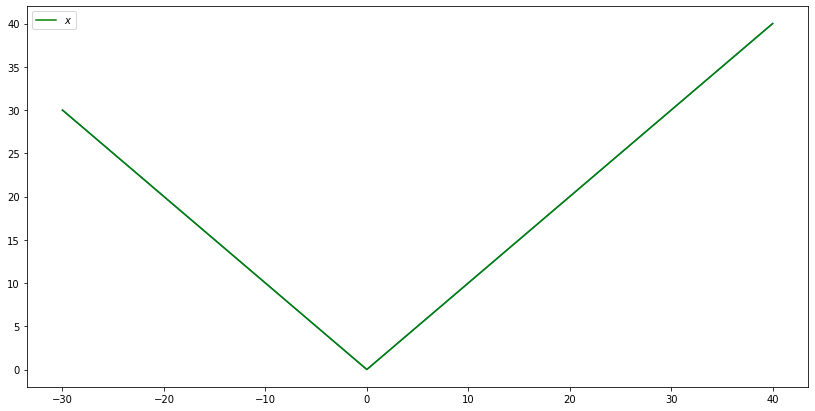

In [23]:
# Create a plot 
plt.plot(array_3, np.absolute(array_3))
# Set a color
plt.plot(array_3, abs_array_3, color = 'green', label="$x$")
# Set a legend 
plt.legend(loc='best')
# Show the plot
plt.show()

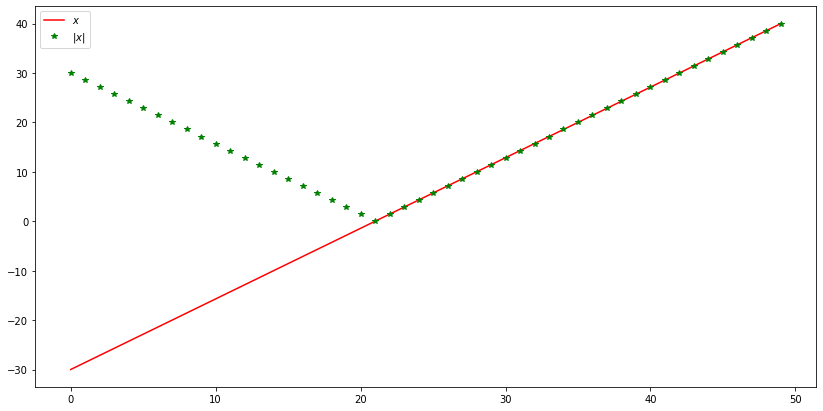

In [24]:
# Create a plot with showing absolut 'y=|x|'
plt.plot(array_3, 'r-', label="$x$")
plt.plot(abs_array_3, 'g*', label="$|x|$")
# Set a legend 
plt.legend(loc='best')
# Set a color
# plt.plot(array_3, array_3, color = 'red')

# Show the plot
plt.show()

We can notice that the **Absolute Value Function** ``y=|x|`` is refracted at the value ``y=0``, and by this, we can say that the function will always depict lines of positive values.

#### Create Reflection Plot$^{[5]}$
***
To reflect the **Absolute Value Function** we going to use $$y=-|x|$$

In [25]:
# Use the '𝑦=−|𝑥|' for the array
ref_array = np.absolute(array_3) * (-1)

# print the 'ref_array'
ref_array

array([-30.        , -28.57142857, -27.14285714, -25.71428571,
       -24.28571429, -22.85714286, -21.42857143, -20.        ,
       -18.57142857, -17.14285714, -15.71428571, -14.28571429,
       -12.85714286, -11.42857143, -10.        ,  -8.57142857,
        -7.14285714,  -5.71428571,  -4.28571429,  -2.85714286,
        -1.42857143,  -0.        ,  -1.42857143,  -2.85714286,
        -4.28571429,  -5.71428571,  -7.14285714,  -8.57142857,
       -10.        , -11.42857143, -12.85714286, -14.28571429,
       -15.71428571, -17.14285714, -18.57142857, -20.        ,
       -21.42857143, -22.85714286, -24.28571429, -25.71428571,
       -27.14285714, -28.57142857, -30.        , -31.42857143,
       -32.85714286, -34.28571429, -35.71428571, -37.14285714,
       -38.57142857, -40.        ])

#### Vertical Stretch/Shrink$^{[5]}$
***
To create the _Vertical Stretch/Shrink_ **Absolute Value Function** we will to use $$y=3|x|$$

In [26]:
# Use the '𝑦=3|𝑥|' for the array
ver_array = 3 * (np.absolute(array_3))

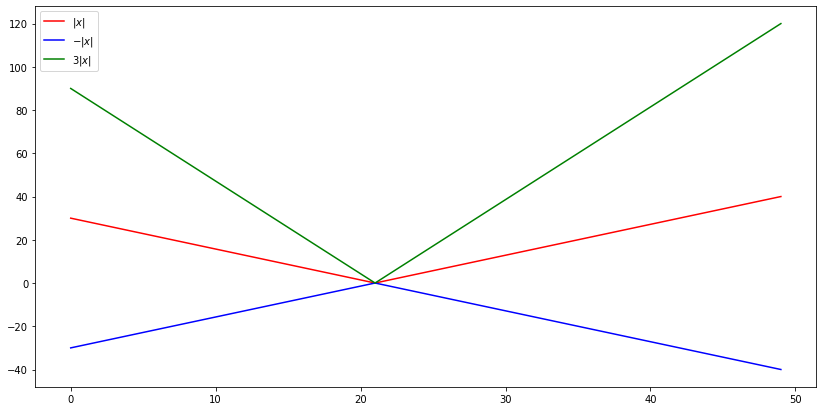

In [27]:
# Create a plot for 'y=|x|', 'y=-|x|' and 'y=3|x|'
plt.plot(abs_array_3, 'r-', label="$|x|$")
plt.plot(ref_array, 'b-', label="$-|x|$")
plt.plot(ver_array, 'g-', label="$3|x|$")
# Set a legend 
plt.legend(loc='best')

# Show the plot
plt.show()

#### Create a plot the function over the complex plane
***

In [28]:
# Take the array from the example above
np.absolute(array_3)

array([30.        , 28.57142857, 27.14285714, 25.71428571, 24.28571429,
       22.85714286, 21.42857143, 20.        , 18.57142857, 17.14285714,
       15.71428571, 14.28571429, 12.85714286, 11.42857143, 10.        ,
        8.57142857,  7.14285714,  5.71428571,  4.28571429,  2.85714286,
        1.42857143,  0.        ,  1.42857143,  2.85714286,  4.28571429,
        5.71428571,  7.14285714,  8.57142857, 10.        , 11.42857143,
       12.85714286, 14.28571429, 15.71428571, 17.14285714, 18.57142857,
       20.        , 21.42857143, 22.85714286, 24.28571429, 25.71428571,
       27.14285714, 28.57142857, 30.        , 31.42857143, 32.85714286,
       34.28571429, 35.71428571, 37.14285714, 38.57142857, 40.        ])

``np.newaxis()`` is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 
**1D array will become 2D array**$^{[6]}$

In [29]:
# create the 2D array
comp_array_3 = array_3 + 2j * array_3[:, np.newaxis]

# print the 'comp_array_3'
comp_array_3

array([[-30.        -60.j        , -28.57142857-60.j        ,
        -27.14285714-60.j        , ...,  37.14285714-60.j        ,
         38.57142857-60.j        ,  40.        -60.j        ],
       [-30.        -57.14285714j, -28.57142857-57.14285714j,
        -27.14285714-57.14285714j, ...,  37.14285714-57.14285714j,
         38.57142857-57.14285714j,  40.        -57.14285714j],
       [-30.        -54.28571429j, -28.57142857-54.28571429j,
        -27.14285714-54.28571429j, ...,  37.14285714-54.28571429j,
         38.57142857-54.28571429j,  40.        -54.28571429j],
       ...,
       [-30.        +74.28571429j, -28.57142857+74.28571429j,
        -27.14285714+74.28571429j, ...,  37.14285714+74.28571429j,
         38.57142857+74.28571429j,  40.        +74.28571429j],
       [-30.        +77.14285714j, -28.57142857+77.14285714j,
        -27.14285714+77.14285714j, ...,  37.14285714+77.14285714j,
         38.57142857+77.14285714j,  40.        +77.14285714j],
       [-30.        +80.j   

``plt.imshow()`` - Display data as an image,  on a 2D regular raster$^{[7]}$

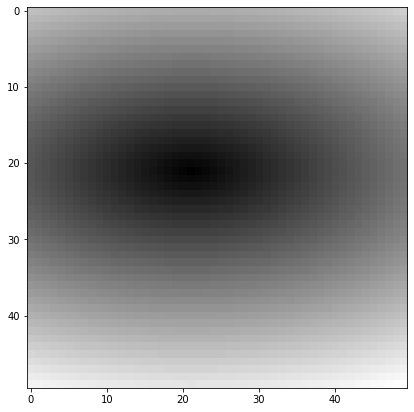

In [30]:
# Create 2D plot
plt.imshow(np.abs(comp_array_3), cmap='gray')

# Show the plot
plt.show()

### Conclusion 
***

In this _Jupyter notebook_, I showed and explained how to use ``np.absolute()`` function and how to calculate the absolute value of each element in a given array with examples and plots. Above, we have seen examples of how the absolute value function changes negative values and the graph refracted. The absolute value of a number represents its distance from ``y=0``. 
It also explains to us how to determine the vertex of an absolute value function and whether it will be upward or downward-facing.The **Absolute Value Function** is not a good choice for plotting straight lines.  


## References<a class="anchor" id="References"></a>
***

[1] https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

[2] https://numpy.org/doc/stable/reference/routines.math.html

[3] https://docs.python.org/3/library/random.html

[4] https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

[5] https://mathbitsnotebook.com/Algebra2/AbsoluteValue/AVGraphs.html

[6] https://numpy.org/devdocs/reference/constants.html#numpy.newaxis

[7] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

- https://sparkbyexamples.com/numpy/numpy-absolute-value/

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

- https://en.wikipedia.org/wiki/Absolute_value

- https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

<center><h2 style="color: rgb(94, 3, 0);">End</h2></center>